In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [117]:
class AdalineGD():
    """ADAptive Linear NEuron classifier"""
    def __init__(self, eta=0.01, epochs=10,random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    
    def fit(self, X, y):
        np.random.RandomState(self.random_seed)
        #w size is increased by one for bias
        self.w = np.random.random(size=X.shape[1]+1)
        
        self.maxy = y.max()
        self.miny = y.min()
        
        self.cost_ = []
        self.w_ = np.array([self.w])
        
        """Momentum"""
        self.v1 = np.zeros_like(self.w[1:])
        self.v2 = np.zeros_like(self.w[0])
        gamma = 0.5
        
        for i in range(self.epochs):
            Z = self.net_input(X)
            yhat = self.activation(Z)
            errors = (y-yhat)
            #self.w[1:] += self.eta * np.dot(errors, X)
            #self.w[0] += self.eta * np.sum(errors)
            """Momentum"""
            self.v1 = gamma*self.v1 + self.eta * np.dot(errors, X)
            self.v2 = gamma*self.v2 + self.eta * np.sum(errors)
            
            self.w[1:] += self.v1
            self.w[0] += self.v2
            
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w])
        
        return self
    
    def net_input(self, X) :
        z = np.dot(X, self.w[1:] + self.w[0])
        return z

    def activation(self, X) :
        return X
    
    def predict(self, X):
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        
        return np.where(yhat > mid, self.maxy, self.miny)

In [118]:
import joy

X, y = joy.iris_data()

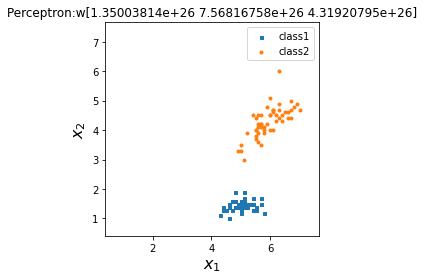

In [119]:
ada = AdalineGD(epochs=10, eta=.1)
ada.fit(X,y)
joy.plot_xyw(X, y, ada.w)

분류하지 못하는 이유?

Text(0, 0.5, 'log(Sum-squared-error)')

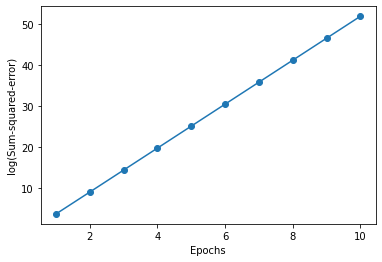

In [120]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(ada.cost_)+1),
         np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')

학습률이 감소하지 못하고 증가하며, 계속해서 발산하는 형태임을 알 수 있다.

### 학습률 조정

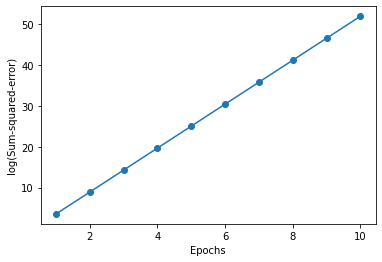

In [121]:
X, y = joy.iris_data()
ada1 = AdalineGD(epochs=10, eta=0.1).fit(X,y)
plt.plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.show()

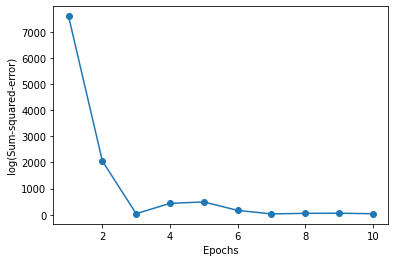

In [122]:
X, y = joy.iris_data()
ada2 = AdalineGD(epochs=10, eta=0.0001).fit(X,y)
plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.show()

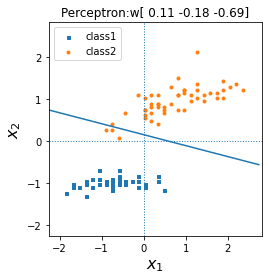

In [94]:
Xstd, y = joy.iris_data(standardized=True)
ada = AdalineGD(epochs=10, eta=0.001)
ada.fit(Xstd, y)
joy.plot_xyw(Xstd, y, ada.w)

In [101]:
ada1.w_[0]

array([0.8639488 , 0.54637054, 0.07641792])

In [112]:
ada2.w_[3]

array([ 0.29182455, -0.3549976 , -0.04099823])